# Kyphosis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('kyphosis.csv')

In [4]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


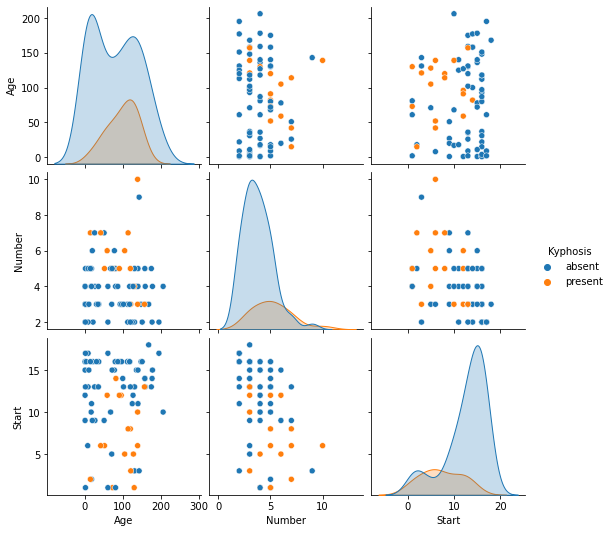

In [6]:
sns.pairplot(data, hue='Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [34]:
X = data.drop('Kyphosis', axis=1)
y = data['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators= 50)

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [43]:
pred = rf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.85      0.81      0.83        21
     present       0.20      0.25      0.22         4

    accuracy                           0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.75      0.72      0.73        25



In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier()

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
pred1 = dt.predict(X_test)

In [52]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

      absent       0.85      0.81      0.83        21
     present       0.20      0.25      0.22         4

    accuracy                           0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.75      0.72      0.73        25



# Loan Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('loan_data.csv')

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [21]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

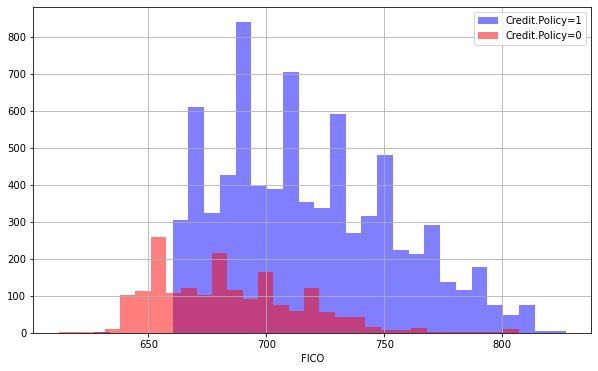

In [22]:
plt.figure(figsize=(10,6))
data[data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
data[data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:>

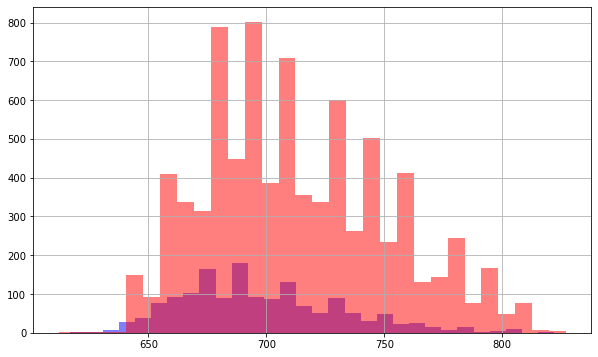

In [23]:
plt.figure(figsize=(10,6))

data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue', bins=30)
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red', bins=30)

C:\Users\saada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

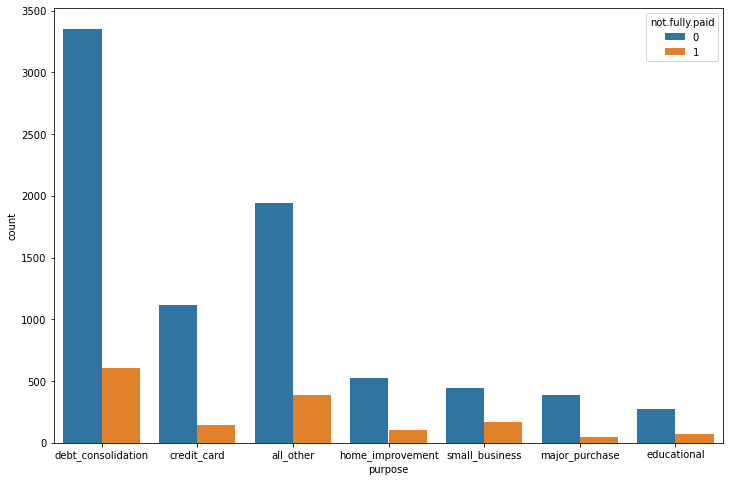

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data['purpose'], hue=data['not.fully.paid'])

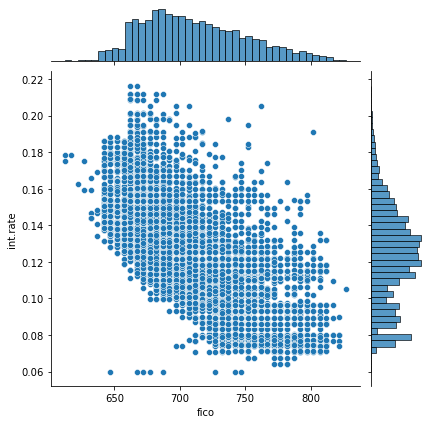

In [26]:
sns.jointplot(x='fico', y='int.rate', data=data)

<Figure size 792x504 with 0 Axes>

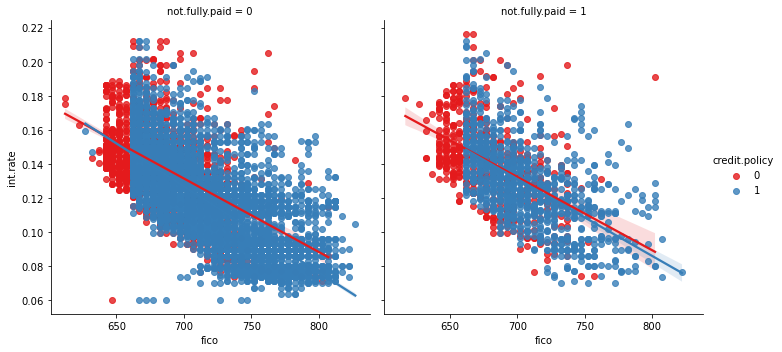

In [27]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico', y='int.rate', data=data, hue='credit.policy',palette='Set1', col='not.fully.paid')

In [28]:
data['purpose'].nunique()

7

In [29]:
final_df = pd.get_dummies(data,columns=['purpose'] ,drop_first=True)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = final_df.drop('credit.policy', axis=1)
y = final_df['credit.policy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [33]:
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier(n_estimators=5000)

In [34]:
dtree.fit(X_train, y_train)
rforest.fit(X_train, y_train)
dpred = dtree.predict(X_test)
rpred = rforest.predict(X_test)

In [35]:
print('Decision Tree Classifier :\n\n')
print(classification_report(y_test, dpred))
print('Random Forest Classifier :\n\n')
print(classification_report(y_test, rpred))

Decision Tree Classifier :


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       563
           1       0.99      1.00      1.00      2311

    accuracy                           0.99      2874
   macro avg       0.99      0.99      0.99      2874
weighted avg       0.99      0.99      0.99      2874

Random Forest Classifier :


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       563
           1       0.99      1.00      0.99      2311

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.99      2874
weighted avg       0.99      0.99      0.99      2874

